In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("460lab1abx_data.csv", sep = ",", skiprows=2)
cols = df.columns.values.tolist()
cols
# df

['Data Point #',
 ' Motor Speed [RPM]',
 ' Manometer delta P [dpsi]',
 ' Ambient Temp.[R]',
 ' Viscosity [slug/ft s]',
 ' Ambient Press. [psia]',
 ' Omega Transmitter delta P [dpsi]',
 ' RakeT1 [psid]',
 'RakeT2 [psid]',
 'RakeT3 [psid]',
 'RakeT4 [psid]',
 'RakeT5 [psid]',
 'RakeT6 [psid]',
 'RakeT7 [psid]',
 'RakeT8 [psid]',
 'RakeT9 [psid]',
 'RakeS1 [psid]',
 'RakeS2 [psid]',
 'RakeS3 [psid]',
 'RakeS4 [psid]',
 'RakeS5 [psid]']

In [3]:
#remove extra data point, rearrange dataframes:
df = df.reindex([0,1,2,3,4,5,6,12,8,9,10,11])
df = df.reset_index(drop=True)
df #prints the dataframe for viewing

,Data Point #,Motor Speed [RPM],Manometer delta P [dpsi],Ambient Temp.[R],Viscosity [slug/ft s],Ambient Press. [psia],Omega Transmitter delta P [dpsi],RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],...,RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid],RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,1.0,0.0,0.000000,530.37,3.802343e-07,14.34649,0.000027,0.000133,-0.000003,0.000073,...,0.000071,0.000095,0.000012,-0.000039,0.000006,-0.000015,-0.000031,-0.000078,6.666667e-08,-0.000055
1,2.0,400.0,0.005419,530.37,3.802343e-07,14.34649,0.005327,0.004418,0.004244,0.004358,...,0.004366,0.004388,0.004248,0.004200,0.004176,0.000044,0.000081,-0.000035,4.420000e-05,-0.000025
2,3.0,500.0,0.008598,530.37,3.802343e-07,14.34649,0.008432,0.007125,0.006958,0.007080,...,0.007123,0.007167,0.006928,0.006896,0.006856,0.000083,0.000143,-0.000022,7.703333e-05,-0.000009
3,4.0,600.0,0.012500,530.37,3.802343e-07,14.34649,0.012428,0.010480,0.010304,0.010392,...,0.010505,0.010528,0.010313,0.010292,0.010147,0.000210,0.000302,0.000103,2.123000e-04,0.000104
4,5.0,700.0,0.017558,530.37,3.802343e-07,14.34649,0.017385,0.014860,0.014699,0.014749,...,0.014925,0.014928,0.014596,0.014595,0.014573,0.000060,0.000219,-0.000056,7.750000e-05,-0.000072
5,6.0,800.0,0.023483,530.37,3.802343e-07,14.34649,0.023047,0.019791,0.019537,0.019629,...,0.019892,0.019916,0.019559,0.019549,0.019592,0.000384,0.000580,0.000240,4.121000e-04,0.000235
6,7.0,900.0,0.030275,530.37,3.802343e-07,14.34649,0.029691,0.025834,0.025561,0.025680,...,0.025955,0.026009,0.025563,0.025593,0.025353,0.000502,0.000759,0.000334,4.456667e-04,0.000303
7,13.0,1000.0,0.037573,530.37,3.802343e-07,14.34649,0.037231,0.032770,0.032452,0.032550,...,0.032953,0.033056,0.032432,0.032518,0.032428,0.000308,0.000579,0.000114,3.592000e-04,0.000064
8,9.0,1100.0,0.045521,530.37,3.802343e-07,14.34649,0.045208,0.039624,0.039238,0.039379,...,0.039843,0.039947,0.039260,0.039354,0.039262,0.000425,0.000809,0.000258,5.462667e-04,0.000154
9,10.0,1200.0,0.054264,530.37,3.802343e-07,14.34649,0.053841,0.048012,0.047627,0.047743,...,0.048256,0.048460,0.047608,0.047704,0.047678,0.000372,0.000830,0.000143,5.283667e-04,0.000012


The Omega transmitter measures the difference between ambient pressure and static pressure from the pressure ring. Thus, $\Delta P_{\Omega meas} = P_{atm} - P_{static ring}$. Also, the pressure probes measure relative to the static pressure ring $P_{meas} = P_{total} - P_{static ring}$. Thus, in order to get $P_{total}$: $P_{total} = P_{meas}+P_{static ring} = P_{meas} + P_{atm} - \Delta P_{\Omega meas}$

In [4]:
# P_Tnet = list()
# P_Tnet.append(df[cols[7:16]].mean(axis=1))
# # print(P_Tnet[0])
# P_snet = list()
# P_snet.append(df[cols[17:21]].mean(axis=1))
# print(P_snet[0])
mean_df = pd.concat([df[cols[7:16]].mean(axis=1), df[cols[16:21]].mean(axis=1)], axis=1) #extracts and averages 
#total and static pressure taps
# mean_df.columns = 
# mean_df = mean_df.add(df[cols[5]], axis=0).subtract(df[cols[6]], axis=0) #adds the ambient pressure minus the omega differential pressure

"""
combines all columns into dataframe, while also calculating q_actual = P_T-P_s
"""
mean_df = pd.concat([df[cols[0:2]],mean_df,mean_df[0].subtract(mean_df[1], axis=0)], axis=1) 

mean_df.columns = ['Data point #','Motor RPM',r'$P_{Tavg}$ [psid]',r'$P_{Savg}$ [psid]',r'$q_{actual}$ [dpsi]'] 
#renames columns from default rangeIndex

mean_df

,Data point #,Motor RPM,$P_{Tavg}$ [psid],$P_{Savg}$ [psid],$q_{actual}$ [dpsi]
0,1.0,0.0,0.000045,-0.000036,0.000081
1,2.0,400.0,0.004299,0.000022,0.004277
2,3.0,500.0,0.007018,0.000054,0.006964
3,4.0,600.0,0.010370,0.000186,0.010184
4,5.0,700.0,0.014737,0.000046,0.014691
5,6.0,800.0,0.019679,0.000370,0.019309
6,7.0,900.0,0.025690,0.000469,0.025222
7,13.0,1000.0,0.032636,0.000285,0.032351
8,9.0,1100.0,0.039481,0.000439,0.039043
9,10.0,1200.0,0.047879,0.000377,0.047502


In [5]:
print(mean_df.to_latex(index=False,float_format="%.2e"))

\begin{tabular}{rrrrr}
\toprule
Data point # & Motor RPM & $P_{Tavg}$ [psid] & $P_{Savg}$ [psid] & $q_{actual}$ [dpsi] \\
\midrule
1.00e+00 & 0.00e+00 & 4.47e-05 & -3.58e-05 & 8.06e-05 \\
2.00e+00 & 4.00e+02 & 4.30e-03 & 2.19e-05 & 4.28e-03 \\
3.00e+00 & 5.00e+02 & 7.02e-03 & 5.45e-05 & 6.96e-03 \\
4.00e+00 & 6.00e+02 & 1.04e-02 & 1.86e-04 & 1.02e-02 \\
5.00e+00 & 7.00e+02 & 1.47e-02 & 4.56e-05 & 1.47e-02 \\
6.00e+00 & 8.00e+02 & 1.97e-02 & 3.70e-04 & 1.93e-02 \\
7.00e+00 & 9.00e+02 & 2.57e-02 & 4.69e-04 & 2.52e-02 \\
1.30e+01 & 1.00e+03 & 3.26e-02 & 2.85e-04 & 3.24e-02 \\
9.00e+00 & 1.10e+03 & 3.95e-02 & 4.39e-04 & 3.90e-02 \\
1.00e+01 & 1.20e+03 & 4.79e-02 & 3.77e-04 & 4.75e-02 \\
1.10e+01 & 1.30e+03 & 5.55e-02 & 5.91e-04 & 5.49e-02 \\
1.20e+01 & 1.40e+03 & 6.52e-02 & 5.15e-04 & 6.47e-02 \\
\bottomrule
\end{tabular}



In [6]:
rpm_cols = ['Data point #','Motor RPM',r'$q_{actual}$ [dpsi]',r'$v_{actual}$ [ft/s]','Re/L','Mach #']
"""
q_actual = 1/2*rho*v**2
v = np.sqrt(2*q_actual/rho)
rho = P/(R*T)
R = 1716
Re/L = rho*v/mu
"""
R = 1716 #ft-lbf/slug/deg R
rho_df = df[cols[5]]*144/(R*df[cols[3]]) #using ambient pressure, convert to psf, then use ideal gas law (slug/ft^3)
v_df = (2*mean_df.iloc[:,4]*144/(rho_df))**0.5 #convert q_actual to psf, then use equation
Mach_df = v_df/(1.4*R*df[cols[3]])**0.5
# type(mean_df.iloc[:,4])
# type(df[cols[3]])
# type(pd.Series(df[cols[3]]))
# pd.Series(mean_df.iloc[:,4])
# rho_df
rpm_df = pd.DataFrame({
                rpm_cols[0]: df[cols[0]],
                rpm_cols[1]: df[cols[1]],
                rpm_cols[2]: pd.Series(mean_df.iloc[:,4]),
                rpm_cols[3]: v_df,
                rpm_cols[4]: rho_df*v_df/df[cols[4]],
                rpm_cols[5]: Mach_df,
              })
rpm_df
# rho_df
# v_df
# rpm_df = pd.DataFrame([df[cols[0:2]],mean_df['q_actual [dpsi]'],v_df,rho_df*v_df/df[cols[4]],Mach_df],columns=rpm_cols)


,Data point #,Motor RPM,$q_{actual}$ [dpsi],$v_{actual}$ [ft/s],Re/L,Mach #
0,1.0,0.0,0.000081,3.197378,19087.742451,0.002833
1,2.0,400.0,0.004277,23.294364,139062.962503,0.020637
2,3.0,500.0,0.006964,29.723819,177445.598835,0.026333
3,4.0,600.0,0.010184,35.945818,214589.759791,0.031845
4,5.0,700.0,0.014691,43.174085,257741.153767,0.038248
5,6.0,800.0,0.019309,49.495531,295478.997668,0.043848
6,7.0,900.0,0.025222,56.568776,337704.937777,0.050115
7,13.0,1000.0,0.032351,64.067385,382470.217788,0.056758
8,9.0,1100.0,0.039043,70.381992,420167.233297,0.062352
9,10.0,1200.0,0.047502,77.632779,463453.063593,0.068775


In [7]:
print(rpm_df.to_latex(index=False,float_format="%.2e"))

\begin{tabular}{rrrrrr}
\toprule
Data point # & Motor RPM & $q_{actual}$ [dpsi] & $v_{actual}$ [ft/s] & Re/L & Mach # \\
\midrule
1.00e+00 & 0.00e+00 & 8.06e-05 & 3.20e+00 & 1.91e+04 & 2.83e-03 \\
2.00e+00 & 4.00e+02 & 4.28e-03 & 2.33e+01 & 1.39e+05 & 2.06e-02 \\
3.00e+00 & 5.00e+02 & 6.96e-03 & 2.97e+01 & 1.77e+05 & 2.63e-02 \\
4.00e+00 & 6.00e+02 & 1.02e-02 & 3.59e+01 & 2.15e+05 & 3.18e-02 \\
5.00e+00 & 7.00e+02 & 1.47e-02 & 4.32e+01 & 2.58e+05 & 3.82e-02 \\
6.00e+00 & 8.00e+02 & 1.93e-02 & 4.95e+01 & 2.95e+05 & 4.38e-02 \\
7.00e+00 & 9.00e+02 & 2.52e-02 & 5.66e+01 & 3.38e+05 & 5.01e-02 \\
1.30e+01 & 1.00e+03 & 3.24e-02 & 6.41e+01 & 3.82e+05 & 5.68e-02 \\
9.00e+00 & 1.10e+03 & 3.90e-02 & 7.04e+01 & 4.20e+05 & 6.24e-02 \\
1.00e+01 & 1.20e+03 & 4.75e-02 & 7.76e+01 & 4.63e+05 & 6.88e-02 \\
1.10e+01 & 1.30e+03 & 5.49e-02 & 8.34e+01 & 4.98e+05 & 7.39e-02 \\
1.20e+01 & 1.40e+03 & 6.47e-02 & 9.06e+01 & 5.41e+05 & 8.02e-02 \\
\bottomrule
\end{tabular}



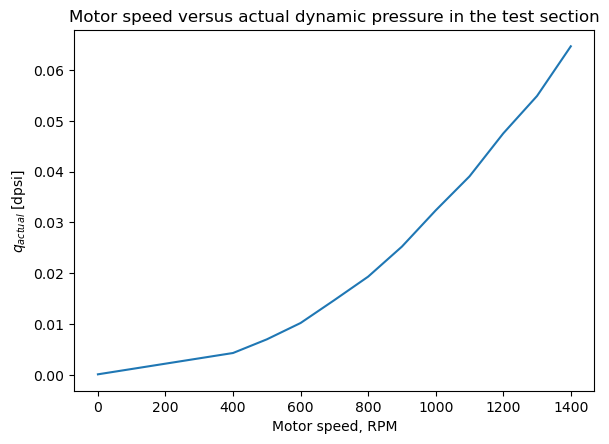

In [8]:
plt.plot(rpm_df['Motor RPM'],rpm_df[r'$q_{actual}$ [dpsi]'])
plt.xlabel("Motor speed, RPM")
plt.ylabel(r'$q_{actual}$ [dpsi]')
plt.title("Motor speed versus actual dynamic pressure in the test section")
plt.tight_layout(pad=2.0)
plt.savefig("2_rpmvsq_actual.jpg", dpi = 300)
plt.show()

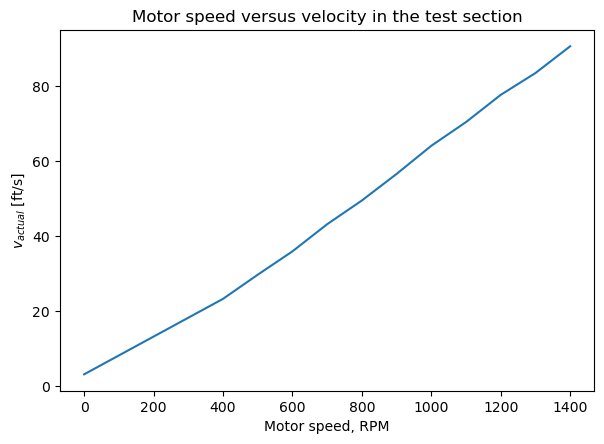

In [9]:
plt.plot(rpm_df['Motor RPM'],rpm_df[r'$v_{actual}$ [ft/s]'])
plt.xlabel("Motor speed, RPM")
plt.ylabel(r'$v_{actual}$ [ft/s]')
plt.title("Motor speed versus velocity in the test section")
plt.tight_layout(pad=2.0)
plt.savefig("2_rpmvsv_actual.jpg", dpi = 300)
plt.show()

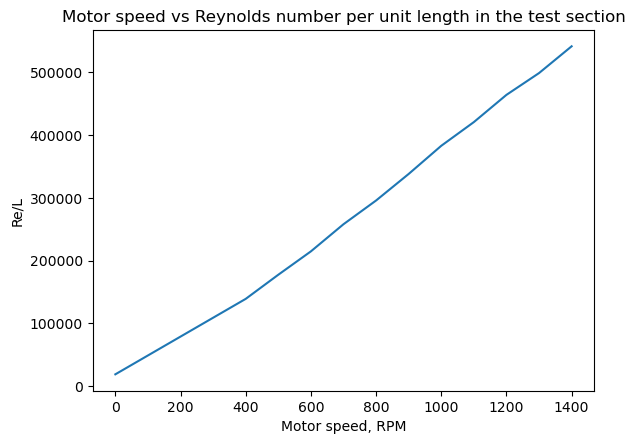

In [10]:
plt.plot(rpm_df['Motor RPM'],rpm_df['Re/L'])
plt.xlabel("Motor speed, RPM")
plt.ylabel('Re/L')
plt.title("Motor speed vs Reynolds number per unit length in the test section")
plt.tight_layout(pad=2.0)
plt.savefig("2_rpmvsRe.jpg", dpi = 300)
plt.show()

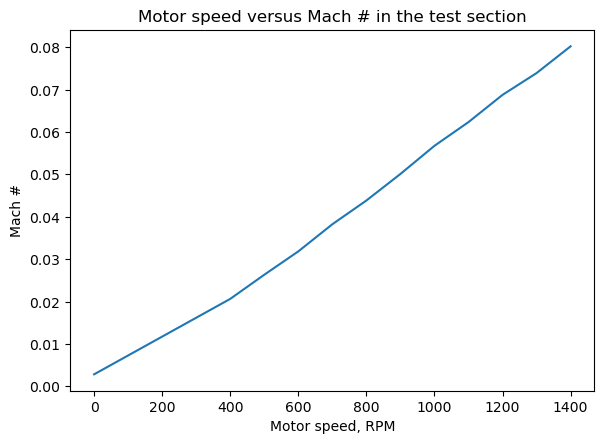

In [11]:
plt.plot(rpm_df['Motor RPM'],rpm_df['Mach #'])
plt.xlabel("Motor speed, RPM")
plt.ylabel('Mach #')
plt.title("Motor speed versus Mach # in the test section")
plt.tight_layout(pad=2.0)
plt.savefig("2_rpmvsMach.jpg", dpi = 300)
plt.show()

# Part 3: TPV and SPV

In [26]:
TPV = (df[cols[7:16]].subtract(mean_df.iloc[:,2],axis=0)).div(mean_df.iloc[:,4],axis=0)
TPV

,RakeT1 [psid],RakeT2 [psid],RakeT3 [psid],RakeT4 [psid],RakeT5 [psid],RakeT6 [psid],RakeT7 [psid],RakeT8 [psid],RakeT9 [psid]
0,1.100452,-0.588630,0.350439,0.105950,0.321067,0.629677,-0.401230,-1.035825,-0.481899
1,0.027938,-0.012793,0.013901,-0.001897,0.015662,0.020845,-0.011881,-0.023066,-0.028709
2,0.015303,-0.008593,0.008932,0.001565,0.015054,0.021358,-0.012920,-0.017444,-0.023255
3,0.010775,-0.006454,0.002118,0.000059,0.013204,0.015475,-0.005590,-0.007692,-0.021894
4,0.008370,-0.002591,0.000819,-0.002031,0.012812,0.013019,-0.009593,-0.009650,-0.011154
5,0.005832,-0.007345,-0.002565,-0.001877,0.011032,0.012294,-0.006195,-0.006701,-0.004474
6,0.005693,-0.005114,-0.000411,-0.000974,0.010475,0.012642,-0.005066,-0.003867,-0.013378
7,0.004124,-0.005684,-0.002676,-0.002088,0.009779,0.012975,-0.006321,-0.003655,-0.006455
8,0.003653,-0.006229,-0.002623,-0.001413,0.009264,0.011911,-0.005677,-0.003263,-0.005622
9,0.002801,-0.005314,-0.002861,-0.001155,0.007930,0.012227,-0.005701,-0.003690,-0.004237


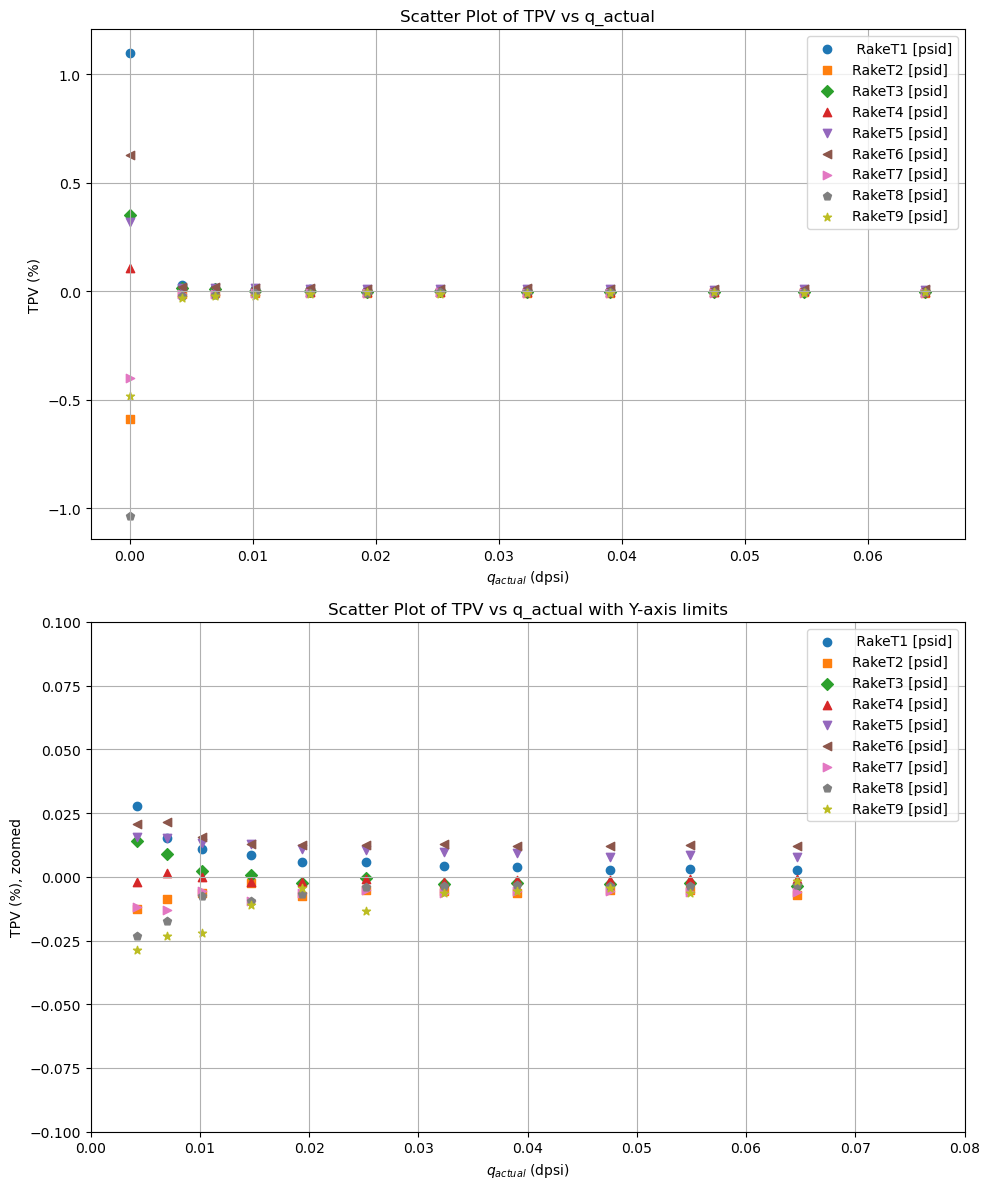

In [27]:
# Define markers and colors for each column
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
colors = plt.cm.tab10.colors  # Use a colormap for colors

# Create the 2x1 subplot figure
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# First scatter plot
for i, col in enumerate(TPV.columns):
    axs[0].scatter(mean_df[r'$q_{actual}$ [dpsi]'], TPV[col], marker=markers[i % len(markers)], color=colors[i % len(colors)], label=col)

# Add labels and legend to the first plot
axs[0].set_xlabel(r'$q_{actual}$ (dpsi)')
axs[0].set_ylabel('TPV (%)')
axs[0].legend()
axs[0].set_title('Scatter Plot of TPV vs q_actual')
axs[0].grid(True)

# Second scatter plot
for i, col in enumerate(TPV.columns):
    axs[1].scatter(mean_df[r'$q_{actual}$ [dpsi]'], TPV[col], marker=markers[i % len(markers)], color=colors[i % len(colors)], label=col)

# Add labels and legend to the second plot
axs[1].set_xlabel(r'$q_{actual}$ (dpsi)')
axs[1].set_xlim(0, 0.08)
axs[1].set_ylabel('TPV (%), zoomed')
axs[1].legend()
axs[1].set_ylim(-0.1, 0.1)
axs[1].set_title('Scatter Plot of TPV vs q_actual with Y-axis limits')
axs[1].grid(True)

# Show the figure
plt.tight_layout()
plt.savefig("tpv.png", dpi = 300)
plt.show()

In [28]:
# Calculate the variance for each column in TPV and SPV
tpv_variance = TPV
# Calculate the average variance for each column in TPV
# average_tpv_variance = tpv_variance.mean()
tpv_avg = np.zeros_like(TPV.columns, dtype=float)
#  Choosing to ignore the first element in the columnn since we did not actually test at 0 RPM or 0 pressure
for i, col in enumerate(TPV.columns):
    tpv_avg[i] = tpv_variance[col][1:].mean()
    print(f"Average TPV for {col} is {tpv_avg[i]:.2%}")
abs(tpv_avg).argmin()

Average TPV for  RakeT1 [psid] is 0.82%
Average TPV for RakeT2 [psid] is -0.66%
Average TPV for RakeT3 [psid] is 0.08%
Average TPV for RakeT4 [psid] is -0.11%
Average TPV for RakeT5 [psid] is 1.10%
Average TPV for RakeT6 [psid] is 1.43%
Average TPV for RakeT7 [psid] is -0.73%
Average TPV for RakeT8 [psid] is -0.78%
Average TPV for RakeT9 [psid] is -1.15%


2

In [29]:
SPV = (df[cols[16:21]].subtract(mean_df.iloc[:,3],axis=0)).div(mean_df.iloc[:,4],axis=0)
SPV

,RakeS1 [psid],RakeS2 [psid],RakeS3 [psid],RakeS4 [psid],RakeS5 [psid]
0,0.259547,0.056840,-0.521080,0.445706,-0.241014
1,0.005122,0.013890,-0.013256,0.005216,-0.010972
2,0.004119,0.012658,-0.010912,0.003243,-0.009107
3,0.002292,0.011356,-0.008149,0.002558,-0.008057
4,0.000981,0.011774,-0.006937,0.002175,-0.007992
5,0.000724,0.010854,-0.006722,0.002170,-0.007026
6,0.001313,0.011514,-0.005344,-0.000914,-0.006569
7,0.000715,0.009079,-0.005270,0.002296,-0.006820
8,-0.000359,0.009494,-0.004616,0.002759,-0.007278
9,-0.000112,0.009529,-0.004921,0.003183,-0.007678


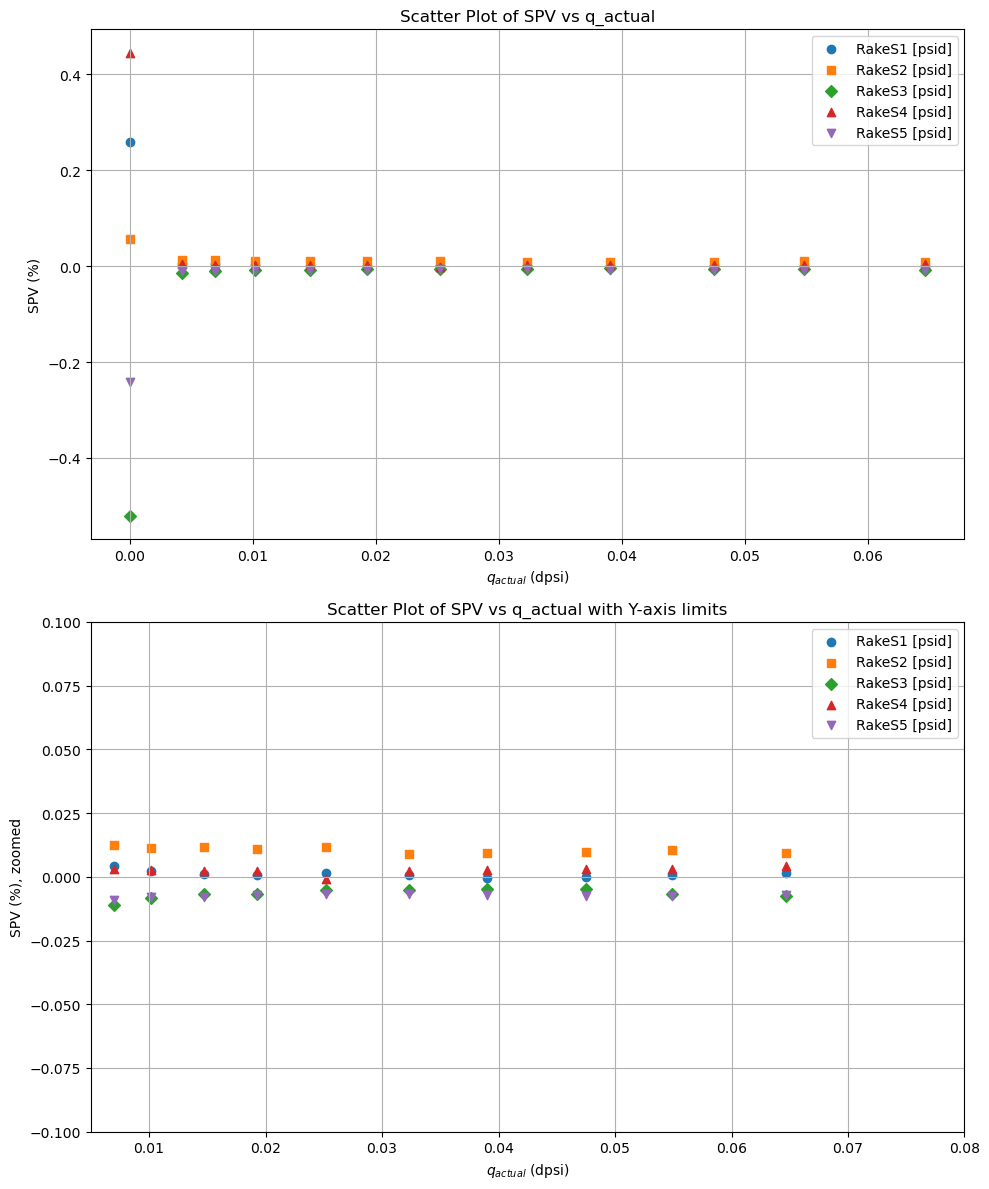

In [30]:
# Define markers and colors for each column
markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', '*']
colors = plt.cm.tab10.colors  # Use a colormap for colors

# Create the 2x1 subplot figure
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# First scatter plot
for i, col in enumerate(SPV.columns):
    axs[0].scatter(mean_df[r'$q_{actual}$ [dpsi]'], SPV[col], marker=markers[i % len(markers)], color=colors[i % len(colors)], label=col)

# Add labels and legend to the first plot
axs[0].set_xlabel(r'$q_{actual}$ (dpsi)')
axs[0].set_ylabel('SPV (%)')
axs[0].legend()
axs[0].set_title('Scatter Plot of SPV vs q_actual')
axs[0].grid(True)

# Second scatter plot
for i, col in enumerate(SPV.columns):
    axs[1].scatter(mean_df[r'$q_{actual}$ [dpsi]'], SPV[col], marker=markers[i % len(markers)], color=colors[i % len(colors)], label=col)

# Add labels and legend to the second plot
axs[1].set_xlabel(r'$q_{actual}$ (dpsi)')
axs[1].set_xlim(0.005, 0.08)
axs[1].set_ylabel('SPV (%), zoomed')
axs[1].legend()
axs[1].set_ylim(-0.1, 0.1)
axs[1].set_title('Scatter Plot of SPV vs q_actual with Y-axis limits')
axs[1].grid(True)

# Show the figure
plt.tight_layout()
plt.savefig("spv.png", dpi = 300)
plt.show()



In [31]:
# Calculate the variance for each column in TPV and SPV
spv_variance = SPV
# Calculate the average variance for each column in TPV
# average_tpv_variance = tpv_variance.mean()
spv_avg = np.zeros_like(SPV.columns, dtype=float)
#  Choosing to ignore the first element in the columnn since we did not actually test at 0 RPM or 0 pressure
for i, col in enumerate(SPV.columns):
    spv_avg[i] = spv_variance[col][1:].mean()
    print(f"Average SPV for {col} is {tpv_avg[i]:.2%}")
abs(spv_avg).argmin()

Average SPV for RakeS1 [psid] is 0.82%
Average SPV for RakeS2 [psid] is -0.66%
Average SPV for RakeS3 [psid] is 0.08%
Average SPV for RakeS4 [psid] is -0.11%
Average SPV for RakeS5 [psid] is 1.10%


0

# Part 4: Dynamic pressure and measurements

In [18]:
# 7 columns: data point #, RPM, actual dynamic pressure, Omega pressure, percent difference 
# btwn actual and Omega, Manometer press, and percent difference btwn actual dynamic and Dwyer manometer
omega_cols = ['Data point #','Motor RPM',r'$q_{actual}$ [dpsi]',r'$\Delta P_\Omega$ [dpsi]',
              r'% diff $q_{actual}$ & $\Delta P_\Omega$',r'$\Delta P_{measured}$ [dpsi]',
              r'% diff $q_{actual}$ & $\Delta P_{measured}$']

omega_df = pd.DataFrame({
                omega_cols[0]: df[cols[0]],
                omega_cols[1]: df[cols[1]],
                omega_cols[2]: pd.Series(mean_df.iloc[:,4]),
                omega_cols[3]: df[cols[6]],
                omega_cols[4]: (pd.Series(mean_df.iloc[:,4])-df[cols[6]])/pd.Series(mean_df.iloc[:,4]),
                omega_cols[5]: df[cols[2]],
                omega_cols[6]: (pd.Series(mean_df.iloc[:,4])-df[cols[2]])/pd.Series(mean_df.iloc[:,4]),
              })
omega_df

,Data point #,Motor RPM,$q_{actual}$ [dpsi],$\Delta P_\Omega$ [dpsi],% diff $q_{actual}$ & $\Delta P_\Omega$,$\Delta P_{measured}$ [dpsi],% diff $q_{actual}$ & $\Delta P_{measured}$
0,1.0,0.0,0.000081,0.000027,0.665503,0.000000,1.000000
1,2.0,400.0,0.004277,0.005327,-0.245529,0.005419,-0.267106
2,3.0,500.0,0.006964,0.008432,-0.210947,0.008598,-0.234784
3,4.0,600.0,0.010184,0.012428,-0.220391,0.012500,-0.227446
4,5.0,700.0,0.014691,0.017385,-0.183307,0.017558,-0.195125
5,6.0,800.0,0.019309,0.023047,-0.193625,0.023483,-0.216199
6,7.0,900.0,0.025222,0.029691,-0.177211,0.030275,-0.200366
7,13.0,1000.0,0.032351,0.037231,-0.150842,0.037573,-0.161402
8,9.0,1100.0,0.039043,0.045208,-0.157892,0.045521,-0.165925
9,10.0,1200.0,0.047502,0.053841,-0.133459,0.054264,-0.142360


In [19]:
print(omega_df.to_latex(index=False,float_format="%.2e"))

\begin{tabular}{rrrrrrr}
\toprule
Data point # & Motor RPM & $q_{actual}$ [dpsi] & $\Delta P_\Omega$ [dpsi] & % diff $q_{actual}$ & $\Delta P_\Omega$ & $\Delta P_{measured}$ [dpsi] & % diff $q_{actual}$ & $\Delta P_{measured}$ \\
\midrule
1.00e+00 & 0.00e+00 & 8.06e-05 & 2.70e-05 & 6.66e-01 & 0.00e+00 & 1.00e+00 \\
2.00e+00 & 4.00e+02 & 4.28e-03 & 5.33e-03 & -2.46e-01 & 5.42e-03 & -2.67e-01 \\
3.00e+00 & 5.00e+02 & 6.96e-03 & 8.43e-03 & -2.11e-01 & 8.60e-03 & -2.35e-01 \\
4.00e+00 & 6.00e+02 & 1.02e-02 & 1.24e-02 & -2.20e-01 & 1.25e-02 & -2.27e-01 \\
5.00e+00 & 7.00e+02 & 1.47e-02 & 1.74e-02 & -1.83e-01 & 1.76e-02 & -1.95e-01 \\
6.00e+00 & 8.00e+02 & 1.93e-02 & 2.30e-02 & -1.94e-01 & 2.35e-02 & -2.16e-01 \\
7.00e+00 & 9.00e+02 & 2.52e-02 & 2.97e-02 & -1.77e-01 & 3.03e-02 & -2.00e-01 \\
1.30e+01 & 1.00e+03 & 3.24e-02 & 3.72e-02 & -1.51e-01 & 3.76e-02 & -1.61e-01 \\
9.00e+00 & 1.10e+03 & 3.90e-02 & 4.52e-02 & -1.58e-01 & 4.55e-02 & -1.66e-01 \\
1.00e+01 & 1.20e+03 & 4.75e-02 & 5.38e-02 &

# Part 6: Uncertainty

In [20]:
uncert_df=pd.DataFrame({"Known Uncertanties":['Uncertainty in R','Uncertainty in Ambient Pressure (inHg)',
                                              'Uncertainty in Ambient Pressure (psf)',
                                              'Uncertainty in Ambient Temperature (F)', 
                                              'Uncertainty in Ambient Temperature (R)', 
                                              'Uncertainty in Rake measurement (psi)', 
                                              'Uncertainty in Rake measurement (psf)' ],
                "Value":[0,0.148,0.148*70.726,1.8,1.8,0.001,0.001*144]})

uncert_df

#
print(uncert_df.to_latex(index=False,float_format="%.2e"))

\begin{tabular}{lr}
\toprule
Known Uncertanties & Value \\
\midrule
Uncertainty in R & 0.00e+00 \\
Uncertainty in Ambient Pressure (inHg) & 1.48e-01 \\
Uncertainty in Ambient Pressure (psf) & 1.05e+01 \\
Uncertainty in Ambient Temperature (F) & 1.80e+00 \\
Uncertainty in Ambient Temperature (R) & 1.80e+00 \\
Uncertainty in Rake measurement (psi) & 1.00e-03 \\
Uncertainty in Rake measurement (psf) & 1.44e-01 \\
\bottomrule
\end{tabular}



In [21]:
uncert_rho_cols = ['Data point #','Motor RPM','Drho/DP_amb','UP_amb','U_R','Drho/DT_amb','UT_amb']

uncert_rho_df = pd.DataFrame({
                uncert_rho_cols[0]: df[cols[0]],#Data
                uncert_rho_cols[1]: df[cols[1]],#RPM
                uncert_rho_cols[2]: 1/(df[cols[3]].multiply(R)),#Drho/DP_amb
                uncert_rho_cols[3]: df[cols[6]],#UP_amb
                uncert_rho_cols[4]: 0,#Uncertainty of R
                uncert_rho_cols[5]: -((df[cols[5]].multiply(144)).divide
                                      ((df[cols[3]]**2).multiply(R))),#Drho/DT_amb
                uncert_rho_cols[6]: 1.8 #UT_amb,
              })
uncert_rho_df

,Data point #,Motor RPM,Drho/DP_amb,UP_amb,U_R,Drho/DT_amb,UT_amb
0,1.0,0.0,0.000001,0.000027,0,-0.000004,1.8
1,2.0,400.0,0.000001,0.005327,0,-0.000004,1.8
2,3.0,500.0,0.000001,0.008432,0,-0.000004,1.8
3,4.0,600.0,0.000001,0.012428,0,-0.000004,1.8
4,5.0,700.0,0.000001,0.017385,0,-0.000004,1.8
5,6.0,800.0,0.000001,0.023047,0,-0.000004,1.8
6,7.0,900.0,0.000001,0.029691,0,-0.000004,1.8
7,13.0,1000.0,0.000001,0.037231,0,-0.000004,1.8
8,9.0,1100.0,0.000001,0.045208,0,-0.000004,1.8
9,10.0,1200.0,0.000001,0.053841,0,-0.000004,1.8


In [22]:
uncert_vel_cols = ['Data point #','Motor RPM','DV/DP_o','UP_o','DV/DP_s','UP_s','DV/Drho','Urho']

uncert_vel_df = pd.DataFrame({
                uncert_vel_cols[0]: df[cols[0]],#Data
                uncert_vel_cols[1]: df[cols[1]],#RPM
                uncert_vel_cols[2]: (1/(2*rho_df.multiply
                                        ((pd.Series(mean_df.iloc[:,2]).multiply(144)).subtract
                                         ((pd.Series(mean_df.iloc[:,3]).multiply(144))))))**0.5,#DV/DP_o
                uncert_vel_cols[3]: 2.3*0.020885,#UP_o Given(psf)
                uncert_vel_cols[4]: -(1/(2*rho_df.multiply
                                         ((pd.Series(mean_df.iloc[:,2]).multiply
                                           (144)).subtract((pd.Series(mean_df.iloc[:,3]).multiply
                                                            (144))))))**0.5,#DV/DP_s
                uncert_vel_cols[5]: 3.08*0.020885,#UP_s
                uncert_vel_cols[6]: -(((pd.Series(mean_df.iloc[:,2]).multiply(144)).subtract
                                       ((pd.Series(mean_df.iloc[:,3]).multiply(144)))).divide
                                       (2*(rho_df**3)))**0.5, #DV/Drho
                uncert_vel_cols[7]:  ((uncert_rho_df[uncert_rho_cols[2]].multiply
                                       (0.148*70.726))**2+(uncert_rho_df[uncert_rho_cols[5]].multiply
                                                           (1.8))**2)**0.5#Urho
              })
uncert_vel_df

,Data point #,Motor RPM,DV/DP_o,UP_o,DV/DP_s,UP_s,DV/Drho,Urho
0,1.0,0.0,137.782526,0.048035,-137.782526,0.064326,-704.290817,0.000014
1,2.0,400.0,18.911990,0.048035,-18.911990,0.064326,-5131.081777,0.000014
2,3.0,500.0,14.821204,0.048035,-14.821204,0.064326,-6547.306790,0.000014
3,4.0,600.0,12.255745,0.048035,-12.255745,0.064326,-7917.835103,0.000014
4,5.0,700.0,10.203871,0.048035,-10.203871,0.064326,-9510.015561,0.000014
5,6.0,800.0,8.900658,0.048035,-8.900658,0.064326,-10902.449317,0.000014
6,7.0,900.0,7.787737,0.048035,-7.787737,0.064326,-12460.482800,0.000014
7,13.0,1000.0,6.876241,0.048035,-6.876241,0.064326,-14112.211688,0.000014
8,9.0,1100.0,6.259311,0.048035,-6.259311,0.064326,-15503.138977,0.000014
9,10.0,1200.0,5.674701,0.048035,-5.674701,0.064326,-17100.279805,0.000014


In [23]:
uncert_velact_cols = ['Data point #','Motor RPM','V_act','UV_act']

uncert_velact_df = pd.DataFrame({
                uncert_velact_cols[0]: df[cols[0]],#Data
                uncert_velact_cols[1]: df[cols[1]],#RPM
                uncert_velact_cols[2]: v_df,#V_actual
                uncert_velact_cols[3]: (((uncert_vel_df[uncert_vel_cols[2]]).multiply
                                         (uncert_vel_df[uncert_vel_cols[3]]))**2
                                         +((uncert_vel_df[uncert_vel_cols[4]]).multiply
                                           (uncert_vel_df[uncert_vel_cols[5]]))**2)**0.5,#UV_actual
              })
uncert_velact_df

,Data point #,Motor RPM,V_act,UV_act
0,1.0,0.0,3.197378,11.061472
1,2.0,400.0,23.294364,1.518295
2,3.0,500.0,29.723819,1.189878
3,4.0,600.0,35.945818,0.983917
4,5.0,700.0,43.174085,0.819188
5,6.0,800.0,49.495531,0.714564
6,7.0,900.0,56.568776,0.625216
7,13.0,1000.0,64.067385,0.552039
8,9.0,1100.0,70.381992,0.502511
9,10.0,1200.0,77.632779,0.455577


In [24]:
uncert_velact100_cols = ['Data point #','Motor RPM','V_act','UV_act','UV_act%']

uncert_velact100_df = pd.DataFrame({
                uncert_velact100_cols[0]: uncert_velact_df[uncert_velact_cols[0]],#Data
                uncert_velact100_cols[1]: uncert_velact_df[uncert_velact_cols[1]],#RPM
                uncert_velact100_cols[2]: uncert_velact_df[uncert_velact_cols[2]],#V_actual
                uncert_velact100_cols[3]: uncert_velact_df[uncert_velact_cols[3]],#UV_actual
                uncert_velact100_cols[4]: ((uncert_velact_df[uncert_velact_cols[3]]).divide
                                           (uncert_velact_df[uncert_velact_cols[2]])).multiply(100),#U percent
              })

uncert_velact100_df

,Data point #,Motor RPM,V_act,UV_act,UV_act%
0,1.0,0.0,3.197378,11.061472,345.954515
1,2.0,400.0,23.294364,1.518295,6.517862
2,3.0,500.0,29.723819,1.189878,4.003111
3,4.0,600.0,35.945818,0.983917,2.737223
4,5.0,700.0,43.174085,0.819188,1.897407
5,6.0,800.0,49.495531,0.714564,1.443693
6,7.0,900.0,56.568776,0.625216,1.105232
7,13.0,1000.0,64.067385,0.552039,0.861654
8,9.0,1100.0,70.381992,0.502511,0.713976
9,10.0,1200.0,77.632779,0.455577,0.586836
